In [51]:
import os
import glob
import datetime as dt
import dateutil as du
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
local_path = './data/'

# LEGO fan OK ! but i'm only interested with BIG Space sets
By now, we will explore the LEGO datasets in order to select only the data related to our interest. 

Firstly, we will load the LEGO Themes CSV file to get an idea

## LEGO Themes

In [5]:
lego_themes = pd.read_csv(os.path.join(local_path, 'lego_themes.csv'), index_col='id')

In [6]:
lego_themes.head()

,name,parent_id
id,,
1,Technic,NaN
2,Arctic Technic,1.0
3,Competition,1.0
4,Expert Builder,1.0
5,Model,1.0


In [7]:
space_themes = lego_themes[lego_themes['name'].str.contains('Space')]

In [8]:
space_themes

,name,parent_id
id,,
93,Space Port,50.0
126,Space,NaN
130,Classic Space,126.0
139,Space Police I,126.0
140,Space Police II,126.0
141,Space Police III,126.0
422,Space,411.0
452,Space,443.0
527,Space,507.0


In [9]:
space_ids = space_themes.index

Now we have Space related stuff and we will filter the `sets` dataset !

## LEGO Sets
We will load and extract sets with related Theme *Space*

In [10]:
lego_sets = pd.read_csv(os.path.join(local_path, 'lego_sets.csv'))

In [11]:
lego_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [12]:
space_sets = lego_sets[lego_sets['theme_id'].isin(space_ids)]

In [13]:
space_sets.head()

,set_num,name,year,theme_id,num_parts
813,1180-1,Space Port Moon Buggy,1999,93,25
815,1181-1,Space Port Spacecraft,1999,93,23
832,11910-1,Micro-Scale Space Cruiser,2015,126,102
869,12-1,Blue Space Elements,1981,452,8
877,1213-1,Space Radar Disks,1982,452,5


Now, let's pick the sets that were released in my childhood !
I was born in 1984, got my first LEGO set at 3 and bought many till 1998.

In [15]:
childhood_sets = space_sets[(space_sets['year'] >= 1987) & (space_sets['year'] <= 1998)]

In [16]:
childhood_sets.head()

,set_num,name,year,theme_id,num_parts
1195,1498-1,Spy-Bot,1987,130,63
1196,1499-1,Twin Starfire,1987,130,89
1206,1510-1,Space Value Pack,1987,130,2
1461,1785-1,Introducing Crater Critters,1995,126,146
1511,1843-1,Space/Castle Value Pack,1996,126,2


Some statistics about those sets :

In [17]:
childhood_sets['num_parts'].describe()

count     32.000000
mean     122.687500
std      148.144314
min        2.000000
25%       26.750000
50%       48.500000
75%      147.500000
max      559.000000
Name: num_parts, dtype: float64

In [18]:
childhood_sets.groupby('year')['num_parts'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1987,10.0,80.900000,113.401401,2.0,26.75,41.0,82.50,390.0
1988,1.0,37.000000,NaN,37.0,37.00,37.0,37.00,37.0
1989,6.0,211.166667,152.473495,34.0,128.75,191.0,246.50,478.0
1990,1.0,559.000000,NaN,559.0,559.00,559.0,559.00,559.0
1991,1.0,50.000000,NaN,50.0,50.00,50.0,50.00,50.0
1992,3.0,268.333333,130.676445,146.0,199.50,253.0,329.50,406.0
1993,6.0,35.000000,14.268847,23.0,24.75,32.0,37.75,61.0
1995,1.0,146.000000,NaN,146.0,146.00,146.0,146.00,146.0
1996,2.0,12.000000,14.142136,2.0,7.00,12.0,17.00,22.0


Based on the `max` value, it seems larger sets were released between 1987 and 1992, especially in 1989, 1990 and 1992.
Let's get'em !!!

In [19]:
big_sets = childhood_sets[childhood_sets['num_parts'] > 300]

In [20]:
big_sets

,set_num,name,year,theme_id,num_parts
9305,6972-1,Polaris I Space Lab,1987,130,390
9315,6984-1,Galactic Mediator,1992,140,406
9317,6986-1,Mission Commander,1989,139,478
14025,9355-1,Dacta Space Theme Set,1990,527,559


Which Theme are those sets related to ?

In [21]:
big_sets = big_sets.merge(lego_themes, how='inner', left_index=True, left_on='theme_id', right_on='id', suffixes=('_set', '_theme'))

In [22]:
big_sets = big_sets.drop(['theme_id', 'parent_id'], axis=1)
big_sets

,set_num,name_set,year,num_parts,name_theme
id,,,,,
130,6972-1,Polaris I Space Lab,1987,390,Classic Space
140,6984-1,Galactic Mediator,1992,406,Space Police II
139,6986-1,Mission Commander,1989,478,Space Police I
527,9355-1,Dacta Space Theme Set,1990,559,Space


Sure i want to get those sets ! Or spare parts to build them :) 

Head on to get the parts.

## Lego Inventories & Parts

### Getting the inventories

In [24]:
inventories = pd.read_csv(os.path.join(local_path, 'lego_inventories.csv'))

In [25]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [26]:
my_inventories = big_sets.merge(inventories, how='inner', left_on='set_num', right_on='set_num')

In [27]:
my_inventories

,set_num,name_set,year,num_parts,name_theme,id,version
0,6972-1,Polaris I Space Lab,1987,390,Classic Space,3396,1
1,6984-1,Galactic Mediator,1992,406,Space Police II,3297,1
2,6986-1,Mission Commander,1989,478,Space Police I,12670,1
3,9355-1,Dacta Space Theme Set,1990,559,Space,3140,1


### Getting the parts for each set

In [29]:
inventories_parts = pd.read_csv(os.path.join(local_path, 'lego_inventory_parts.csv'), index_col='inventory_id')

In [30]:
inventories_parts.head()

,part_num,color_id,quantity,is_spare
inventory_id,,,,
1,48379c01,72,1,f
1,48395,7,1,f
1,mcsport6,25,1,f
1,paddle,0,1,f
3,11816pr0005,78,1,f


In [31]:
my_parts = inventories_parts.loc[my_inventories['id']]

In [32]:
my_parts.head()

,part_num,color_id,quantity,is_spare
inventory_id,,,,
3396,2342,15,2,f
3396,2345,15,3,f
3396,2357,15,1,f
3396,2418a,15,1,f
3396,2419,36,4,f


### Now joining other dataframes to make it human readable

In [33]:
colors = pd.read_csv(os.path.join(local_path, 'lego_colors.csv'))

In [35]:
parts = pd.read_csv(os.path.join(local_path, 'lego_parts.csv'))

In [36]:
my_parts = my_parts.merge(colors, how='inner', left_on='color_id', right_on='id', suffixes=('_my', '_color'))

In [37]:
my_parts = my_parts.merge(parts, how='inner', left_on='part_num', right_on='part_num', suffixes=('_color', '_part'))

In [38]:
my_parts.head()

,part_num,color_id,quantity,is_spare,id,name_color,rgb,is_trans,name_part,part_cat_id,part_material_id
0,2342,15,2,f,15,White,FFFFFF,f,Equipment Control Panel,27,1
1,2345,15,3,f,15,White,FFFFFF,f,Panel 3 x 3 x 6 Corner Wall,23,1
2,2357,15,1,f,15,White,FFFFFF,f,Brick 2 x 2 Corner,11,1
3,2357,15,20,f,15,White,FFFFFF,f,Brick 2 x 2 Corner,11,1
4,2357,0,4,f,0,Black,05131D,f,Brick 2 x 2 Corner,11,1


There are some columns we can drop, as we got the textual value when merging dataframes

In [39]:
my_parts = my_parts.drop(['color_id', 'id', 'part_cat_id', 'part_material_id'], axis=1)

In [40]:
my_parts.head()

,part_num,quantity,is_spare,name_color,rgb,is_trans,name_part
0,2342,2,f,White,FFFFFF,f,Equipment Control Panel
1,2345,3,f,White,FFFFFF,f,Panel 3 x 3 x 6 Corner Wall
2,2357,1,f,White,FFFFFF,f,Brick 2 x 2 Corner
3,2357,20,f,White,FFFFFF,f,Brick 2 x 2 Corner
4,2357,4,f,Black,05131D,f,Brick 2 x 2 Corner


In [43]:
my_parts['quantity'].describe()

count    515.000000
mean       3.561165
std        3.666237
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       40.000000
Name: quantity, dtype: float64

In [44]:
my_parts['quantity'].sum()

1834

In [45]:
my_parts.groupby('name_color')['quantity'].sum()

name_color
Black               612
Blue                302
Dark Gray             2
Green                 6
Light Gray          146
Red                  85
Trans-Clear           3
Trans-Dark Blue      22
Trans-Green          23
Trans-Light Blue     12
Trans-Neon Green      1
Trans-Red            82
White               493
Yellow               45
Name: quantity, dtype: int64

In [46]:
my_parts.groupby('part_num')['quantity'].sum()

part_num
122c02           7
200              1
202              1
2340             8
2342             2
2345             3
2357            33
2362a            7
2362ap53         2
2362ap54         2
2401             6
2412a            6
2412b           12
2418a            1
2419            15
2420             7
2428             1
2431            11
2432             8
2433             2
2434             2
2436             4
2440             1
2445             3
2446            14
2447            15
2450             4
2452             5
2454a            4
2458             2
                ..
4737             1
4740            15
4854             3
4856a            1
4857             2
4859             1
4864a            6
4871             2
4872             3
4873             2
6007             2
6019             2
6058             1
6061b            4
608p03           2
6099p03          1
6141            14
73590c01a        4
73983            6
970c00           8
970x001          2
970

So now i got a complete inventory of parts to buy, with colors used :)

# LEGO Space sets Data Analysis
In the first part, we worked on getting Data based on our preference.
Now it's time to get a bigger picture of Space sets !

Let's get back to our `space_sets` dataframe

In [48]:
space_sets['num_parts'].describe()

count    171.000000
mean     131.771930
std      152.107626
min        2.000000
25%       25.500000
50%       66.000000
75%      187.000000
max      825.000000
Name: num_parts, dtype: float64

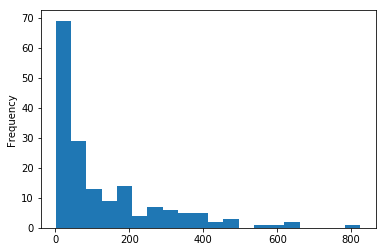

In [66]:
space_sets['num_parts'].plot.hist(bins=20)
plt.show()

Space sets tend to be "small" sets, the more were released with a number of parts less than 200.

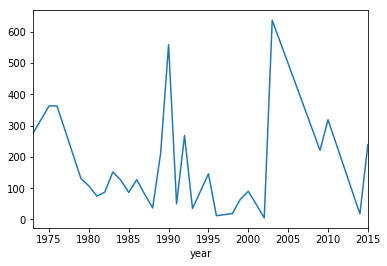

In [64]:
space_sets.groupby('year')['num_parts'].mean().plot()
plt.show()

The distribution of the average number of parts by year is pretty uneven.

We are going to analyze the parts used in Space sets

In [67]:
space_inventories = space_sets.merge(inventories, how='inner', left_on='set_num', right_on='set_num')

In [68]:
space_inventories.head()

,set_num,name,year,theme_id,num_parts,id,version
0,1180-1,Space Port Moon Buggy,1999,93,25,1713,1
1,1181-1,Space Port Spacecraft,1999,93,23,4408,1
2,11910-1,Micro-Scale Space Cruiser,2015,126,102,9862,1
3,12-1,Blue Space Elements,1981,452,8,11920,1
4,1213-1,Space Radar Disks,1982,452,5,15402,1


In [69]:
space_parts = inventories_parts.loc[space_inventories['id']]

/home/jupyter/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [70]:
space_parts.head()

,part_num,color_id,quantity,is_spare
inventory_id,,,,
1713,2412b,1.0,2.0,f
1713,30027a,15.0,4.0,f
1713,30028,0.0,4.0,f
1713,3626bp69,14.0,1.0,f
1713,3700,15.0,1.0,f


In [71]:
space_parts = space_parts.merge(colors, how='inner', left_on='color_id', right_on='id', suffixes=('_space', '_color'))

In [72]:
space_parts = space_parts.merge(parts, how='inner', left_on='part_num', right_on='part_num', suffixes=('_color', '_part'))

In [73]:
space_parts = space_parts.drop(['color_id', 'id', 'part_cat_id', 'part_material_id'], axis=1)

In [74]:
space_parts.head()

,part_num,quantity,is_spare,name_color,rgb,is_trans,name_part
0,2412b,2.0,f,Blue,0055BF,f,Tile Special 1 x 2 Grille with Bottom Groove
1,2412b,2.0,f,Blue,0055BF,f,Tile Special 1 x 2 Grille with Bottom Groove
2,2412b,2.0,f,Blue,0055BF,f,Tile Special 1 x 2 Grille with Bottom Groove
3,2412b,2.0,f,Blue,0055BF,f,Tile Special 1 x 2 Grille with Bottom Groove
4,2412b,4.0,f,Blue,0055BF,f,Tile Special 1 x 2 Grille with Bottom Groove


In [91]:
space_parts['quantity'].sum()

24016.0

In [76]:
space_parts_qty = space_parts.groupby('part_num')['quantity'].sum()

In [79]:
space_parts_qty = space_parts_qty.sort_values(ascending=False)

In [80]:
space_parts_qty.head(10)

part_num
3023     841.0
6141     691.0
3004     569.0
3024     468.0
3710     379.0
3941     363.0
3020     354.0
3022     340.0
4589     293.0
3957a    261.0
Name: quantity, dtype: float64

Here's our top 10 parts for space sets, with a high frequencies for the first four elements.
What are those parts ?

Here they are !
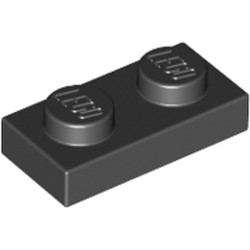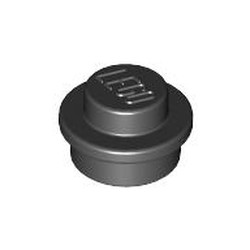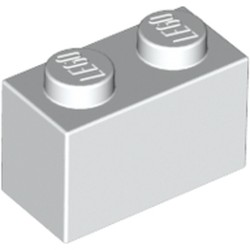
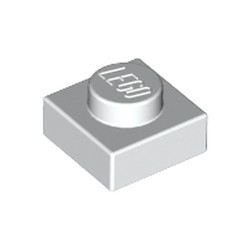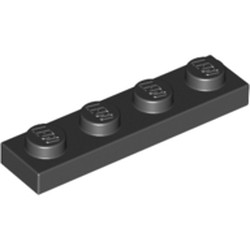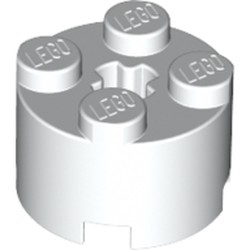
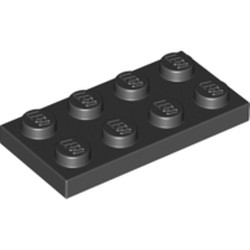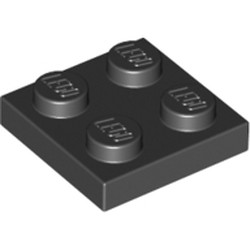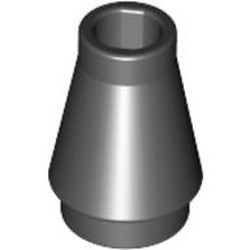
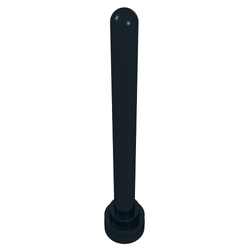

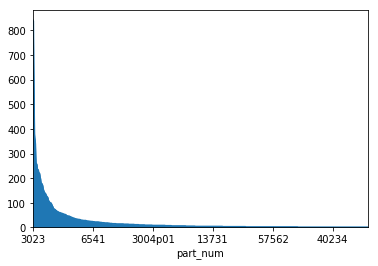

In [89]:
space_parts_qty.plot(kind='area')
plt.show()

In [90]:
space_parts_qty.describe()

count    1119.000000
mean       21.462020
std        57.843136
min         1.000000
25%         2.000000
50%         4.000000
75%        14.000000
max       841.000000
Name: quantity, dtype: float64

Here are the insights from Space sets parts :
  * 1119 different parts for a 24016 parts in total (!!!)
  * The mean is almost 22 pieces of each part, but
  * ... for half of each part, it's only 4 pieces of each (50th percentile)
  
It's time to have a look upon the whole LEGO collection !

## LEGO collection Data Analysis

In [92]:
lego_sets['num_parts'].describe()

count    15443.000000
mean       159.970019
std        356.302715
min          0.000000
25%          9.000000
50%         43.000000
75%        157.000000
max       9988.000000
Name: num_parts, dtype: float64

As we can see, there have been 15,443 sets released, with a mean of 160 parts per set.
The bigger LEGO set ever made has almost 10,000 parts !!!

We don't need the sets that have no parts in our analysis

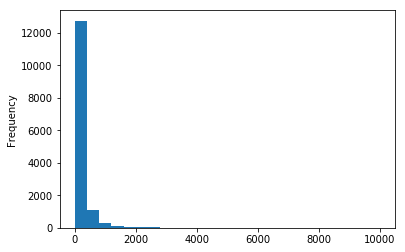

In [103]:
lego_sets[lego_sets['num_parts'] > 0]['num_parts'].plot.hist(bins=25)
plt.show()

In [124]:
themed_sets = lego_sets[lego_sets['num_parts'] > 0].merge(lego_themes, how='inner', left_on='theme_id', right_on='id', suffixes=('_set', '_theme'))

In [162]:
sets_by_theme = themed_sets.groupby('theme_id')['set_num'].count()

In [165]:
sets_by_theme = sets_by_theme.sort_values(axis=0)

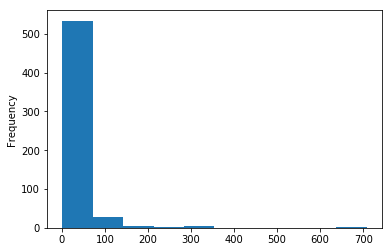

In [169]:
sets_by_theme.plot(kind='hist')
plt.show()

In [170]:
sets_by_year = themed_sets.groupby('year')['set_num'].count()

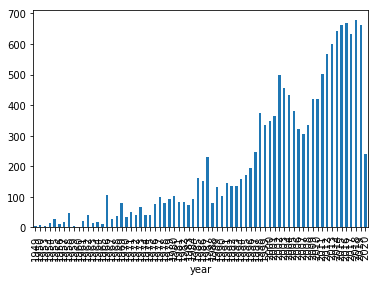

In [171]:
sets_by_year.plot(kind='bar')
plt.show()

LEGO tends to release more sets each year

In [144]:
parts_mean_by_theme = themed_sets.groupby('theme_id')['num_parts'].mean()

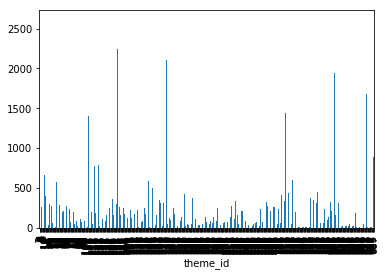

In [145]:
parts_mean_by_theme.plot(kind='bar', x='theme_id', y='num_parts')
plt.show()

The `num_parts` distribution by theme is really uneven. Some themes have a large means, others have very low number of parts.

In [146]:
parts_mean_by_year = themed_sets.groupby('year')['num_parts'].mean()

In [147]:
parts_mean_by_year.head()

year
1949    99.600000
1950     1.000000
1953    18.000000
1954    12.357143
1955    37.962963
Name: num_parts, dtype: float64

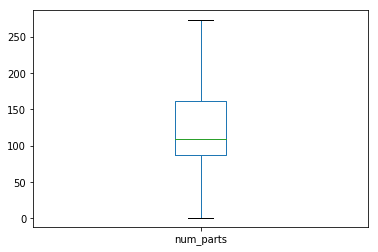

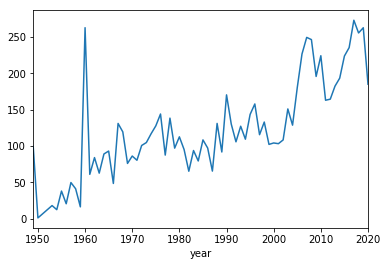

In [148]:
parts_mean_by_year.plot(kind='box')
plt.show()
parts_mean_by_year.plot(kind='line')
plt.show()

The sets tend to be larger over the years

## LEGO essential parts !

In [172]:
collection_inventories = lego_sets.merge(inventories, how='inner', left_on='set_num', right_on='set_num')

In [173]:
collection_parts = inventories_parts.loc[collection_inventories['id']]

/home/jupyter/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [174]:
collection_parts = collection_parts.merge(colors, how='inner', left_on='color_id', right_on='id', suffixes=('_set', '_color'))

In [175]:
collection_parts = collection_parts.merge(parts, how='inner', left_on='part_num', right_on='part_num', suffixes=('_color', '_part'))

In [177]:
collection_parts = collection_parts.drop(['color_id', 'id', 'part_cat_id', 'part_material_id'], axis=1)

In [178]:
collection_parts_qty = collection_parts.groupby('part_num')['quantity'].sum()

In [179]:
collection_parts_qty = collection_parts_qty.sort_values(ascending=False)

In [181]:
collection_parts_qty.head(10)

part_num
3023    81723.0
3004    79286.0
6141    71821.0
3024    62593.0
3005    56464.0
2780    55531.0
3003    47241.0
3710    38053.0
3010    34884.0
3001    33564.0
Name: quantity, dtype: float64

Parts `3023`, `3004`, `6141`, `3024` and `3710` are common with Space theme top 10 parts.
Here are the LEGO essentials 5 other parts :
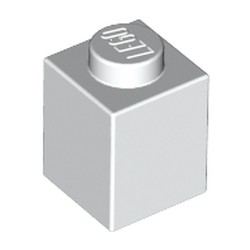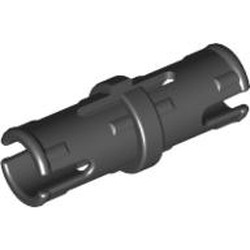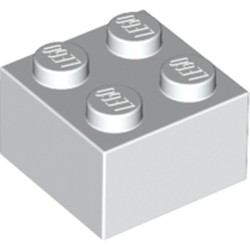
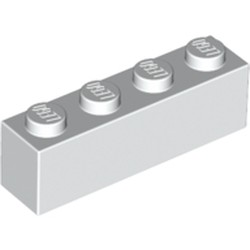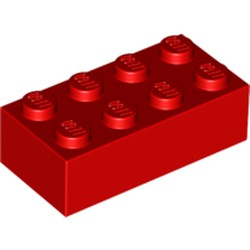

# Final thoughts
There are many ways to analyze this LEGO data, and i guess i only scratched its surface.
When i'll get some more knowledge on Data Analysis, i will sure get back on a new LEGO Data Analysis with new insights to show.